In [1]:
%load_ext autoreload


In [2]:
%autoreload 2

In [21]:
import warnings
warnings.filterwarnings("ignore")

# Task 2: Develop Time Series Forecasting Models

In this task, we will build a time series forecasting model to predict Tesla's future stock prices. Below are the steps to develop, evaluate, and refine forecasting models using common techniques such as ARIMA, SARIMA, or LSTM.

## Step 1: Split the Dataset
- Split the dataset into training and testing sets.

## Step 2: Train the ARIMA Model
- Fit the ARIMA model to the training data and generate forecasts.

## Step 3: Train the SARIMA Model
- Fit the SARIMA model to the training data and generate forecasts.

## Step 4: Train the LSTM Model
- Fit the LSTM model to the training data and generate forecasts.

## Step 5: Plot the Forecasts
- Visualize the forecasts from all models (ARIMA, SARIMA, and LSTM) alongside the historical data.

## Step 6: Evaluate the Models
- Calculate evaluation metrics such as MAE, RMSE, and MAPE for each model to assess performance.

In [24]:
# Import necessary libraries
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

sys.path.append("../scripts/")


In [25]:

# Import the custom modules
from data_preparation import load_data, plot_time_series
from model_training import train_arima_model, train_sarima_model, train_lstm_model
from forecasting import forecast_prices, forecast_sarima, forecast_lstm, evaluate_model


In [26]:

# Step 1: Load the Data
file_path = '../data/TSLA_historical_data.csv'
data = load_data(file_path)


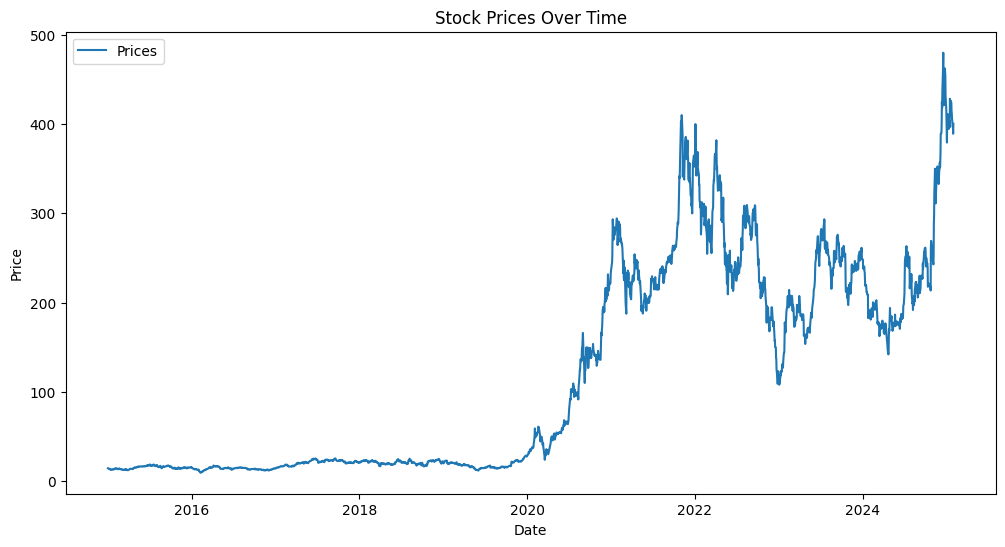

In [27]:

# Step 2: Plot the Time Series
plot_time_series(data['Close'], title='Stock Prices Over Time')


In [28]:

# Step 3: Split the Dataset
train_size = int(len(data) * 0.8)
train, test = data['Close'][:train_size], data['Close'][train_size:]


In [29]:

# Step 4: Train the ARIMA Model
model_fit_arima = train_arima_model(train)
forecast_arima = forecast_prices(model_fit_arima, steps=len(test))


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12684.802, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12680.726, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12679.653, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12679.753, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12678.997, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12680.805, Time=0.54 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.875 seconds


In [30]:

# Step 5: Train the SARIMA Model
seasonal_order = (1, 1, 1, 12)  # Adjust based on your data's seasonality
model_fit_sarima = train_sarima_model(train, seasonal_order)
forecast_sarima = forecast_sarima(model_fit_sarima, steps=len(test))


In [31]:

# Step 6: Train the LSTM Model
lstm_model, scaler = train_lstm_model(train)
forecast_lstm = forecast_lstm(lstm_model, scaler, test)


Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0433
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0024
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0019
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0016
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0016
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0019
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0019
Epoch 12/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014
Epoch 13/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015
Epoch 14/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015
Epoch 15/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
E

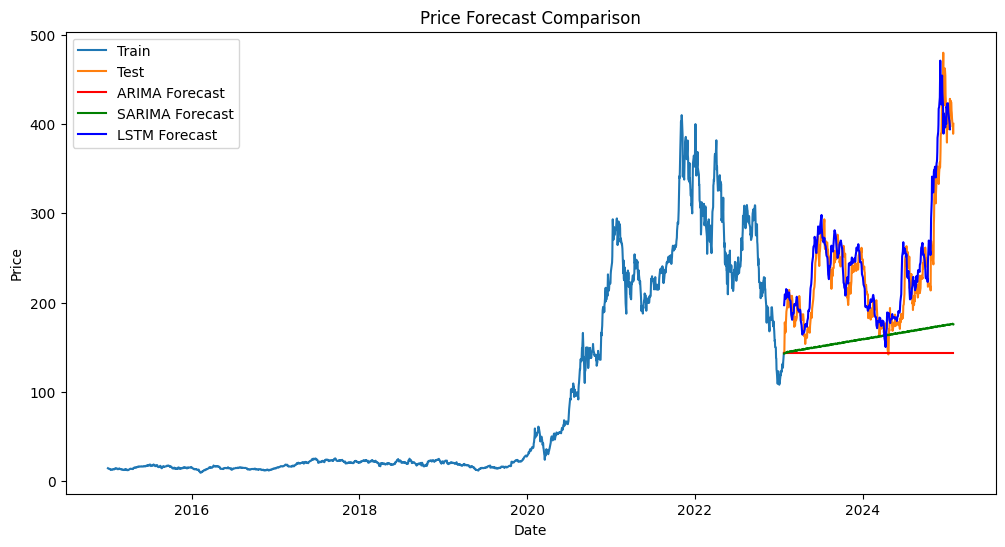

In [32]:
# Step 7: Plot the Forecasts

# Ensure LSTM forecast is a 1D array
forecast_lstm = forecast_lstm.ravel()

# Adjust lengths to match test.index
min_length = min(len(test.index), len(forecast_lstm))
forecast_lstm = forecast_lstm[:min_length]
test_index = test.index[:min_length]

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast', color='red')
plt.plot(test.index, forecast_sarima, label='SARIMA Forecast', color='green')
plt.plot(test_index, forecast_lstm, label='LSTM Forecast', color='blue')

plt.title('Price Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



In [33]:
import numpy as np
forecast_arima = np.nan_to_num(forecast_arima, nan=0.0)  # Replace NaN with 0
forecast_sarima = np.nan_to_num(forecast_sarima, nan=0.0)

In [34]:
# Step 8: Evaluate the Models

forecast_lstm = forecast_lstm.ravel()

# Align the test data with the LSTM output length
test_aligned = test.iloc[:len(forecast_lstm)]

# Evaluate models
mae_arima, rmse_arima, mape_arima = evaluate_model(test, forecast_arima)
mae_sarima, rmse_sarima, mape_sarima = evaluate_model(test, forecast_sarima)
mae_lstm, rmse_lstm, mape_lstm = evaluate_model(test_aligned, forecast_lstm)

print(f'ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}')
print(f'SARIMA - MAE: {mae_sarima}, RMSE: {rmse_sarima}, MAPE: {mape_sarima}')
print(f'LSTM - MAE: {mae_lstm}, RMSE: {rmse_lstm}, MAPE: {mape_lstm}')


ARIMA - MAE: 89.90958562546228, RMSE: 111.07844416791498, MAPE: 34.614067420672825
SARIMA - MAE: 73.9150818530549, RMSE: 95.715434186142, MAPE: 27.814916599936613
LSTM - MAE: 20.67299082581426, RMSE: 27.160412393805352, MAPE: 9.159787652524896


# Task 3: Forecast Future Market Trends

In this task, we will use the model developed in Task 2 to forecast Tesla's future stock prices. The goal is to generate future price predictions, analyze the results, and provide insights on potential trends and risks.

## Step 1: Use the Trained Model for Forecasting
- Generate forecasts for the next 6-12 months using the trained LSTM model.

## Step 2: Visualize the Forecast
- Plot the forecast alongside the historical data and include confidence intervals if applicable.

## Step 3: Interpret the Results

### 3.1 Trend Analysis
- Analyze long-term trends (upward, downward, or stable) and identify any patterns or anomalies in the forecast.

### 3.2 Volatility and Risk
- Discuss the level of uncertainty captured by the confidence intervals and highlight any expected periods of increased volatility.

### 3.3 Market Opportunities and Risks
- Outline potential market opportunities (e.g., expected price increases) and risks (e.g., high volatility or expected declines).

In [36]:
# Step 9: Forecast Future Market Trends

# Generate forecasts for the next 12 months (approx. 252 trading days)
forecast_steps = 252  # Number of days to forecast
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

# Prepare the data for LSTM forecasting
# Create a sequence with the last 'time_step' data points for forecasting
time_step = 10
input_data = data['Close'].values[-time_step:].reshape(-1, 1)
input_scaled = scaler.transform(input_data)

# Prepare the input for LSTM
X_input = input_scaled.reshape((1, time_step, 1))  # Shape: (1, time_step, 1)

# Generate future predictions
future_predictions = []
for _ in range(forecast_steps):
    pred = lstm_model.predict(X_input)
    future_predictions.append(pred[0, 0])
    
    # Update the input with the new prediction
    new_input = np.array([[pred]])  # Shape: (1, 1)
    X_input = np.append(X_input[:, 1:, :], new_input.reshape(1, 1, 1), axis=1)  # Update to keep the shape (1, time_step, 1)

# Inverse transform to get actual prices
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 

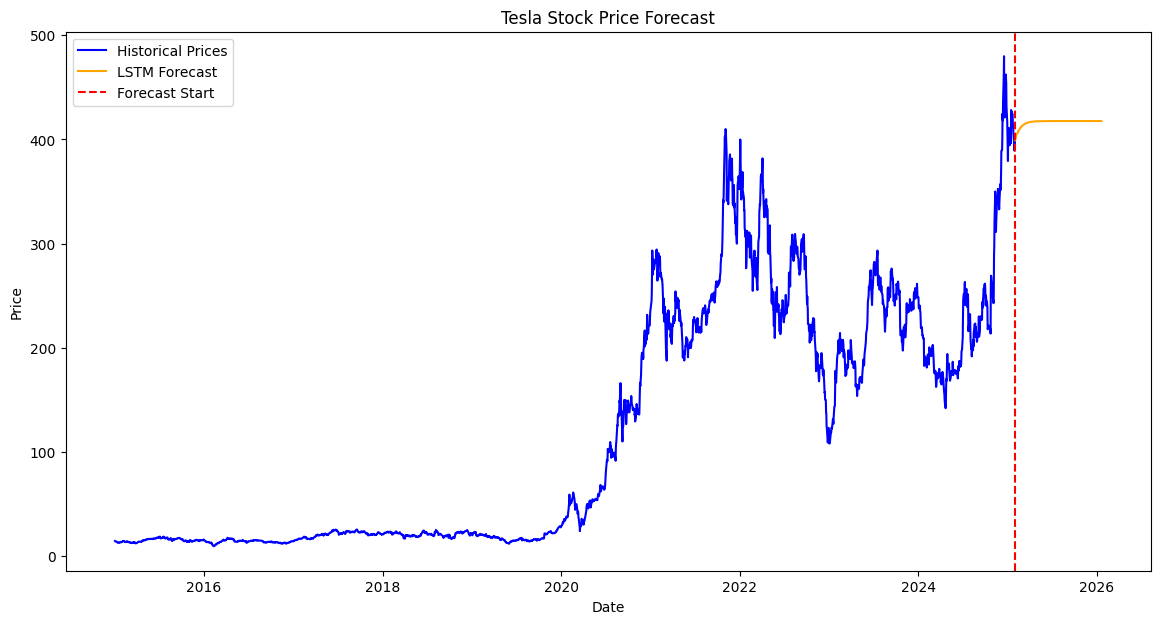

In [37]:
# Step 10: Visualize the Forecast
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Historical Prices', color='blue')
plt.plot(future_dates, future_predictions, label='LSTM Forecast', color='orange')

plt.title('Tesla Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.axvline(x=data.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.legend()
plt.show()



In [38]:
# Step 11: Analyze the Forecast
# Trend Analysis
trend = "upward" if future_predictions[-1] > future_predictions[0] else "downward" if future_predictions[-1] < future_predictions[0] else "stable"
print(f"Trend Analysis: The forecast shows a {trend} trend.")

# Volatility and Risk
# Calculate the standard deviation for volatility
volatility = np.std(future_predictions)
print(f"Volatility: The forecast has a standard deviation of {volatility:.2f}.")

# Market Opportunities and Risks
if future_predictions[-1] > future_predictions[0]:
    print("Market Opportunity: Expected price increases.")
else:
    print("Market Risk: Potential declines expected.")

Trend Analysis: The forecast shows a upward trend.
Volatility: The forecast has a standard deviation of 2.97.
Market Opportunity: Expected price increases.
